In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
import matplotlib.cm as cm
from scipy.integrate import odeint

## Решение нелинейной краевой задачи для уравнения второго порядка методами стрельбы и квазилинеаризации

Получим численное решение следующей нелинейной краевой задачи.

#### $y'' + \frac{0,5}{1-0,5y}(y')^2=0, 0 < x <= 1$

#### $y(0)=y_{0}, y(1)=0$

#### $y_{0}=0,25; 0,5; 1; 1,5; 1,8; 1,9; 1,95$

### Общая постановка задачи

##### $y''=f(x,y,y'), 0<x<=1,$
##### $y(0)=Y_{0}, y(1)=Y_{1}$

In [5]:
Y0 = [0.25, 0.5, 1, 1.5, 1.8, 1.9, 1.95]
Y1 = 0

### Метод стрельбы

Метод стрельбы для решения краевой задачи базируется на том, что имеются удобные способы численного решения задачи Коши, т. е. задачи

##### $y''=f(x,y,y'), 0<x<=1$
##### $y(0)=Y_{0}, y'(0)=\alpha$

В нашем случае: 
##### $y'_{1}(x)=y_2(x)$
##### $y'_{2}(x)=\frac{(0.5y_{2}'(x))^2}{0.5y_{1}(x)-1}$
##### $y_{1}(0)=Y_{0}, y_{2}(0)=\alpha$

где $Y_{0}$ — ордината точки $(0, Y_{0})$, из которой выходит интегральная кривая; $\alpha$ — пристрелочный параметр, можно считать, что он определяет угол наклона интегральной кривой к оси $x$ при выходе из точки $(0, Y_{0})$. При фиксированном $Y_{0}$ решение задачи Коши будет зависеть от пристрелочного параметра, $y=y(x,\alpha)$. В дальнейшем будем считать такую зависимость непрерывной, хотя это не всегда так. При $x=1$ решение $y(x,\alpha)$ зависит только от $\alpha$:

##### $y(x,\alpha)|_{x=1}=y(1,\alpha)$

Найдём $\alpha$ такой, что $y(1,\alpha)=Y_{1}$. Задача свелась к решению уравнения:

$F(\alpha)=0, F(\alpha)=y(1,\alpha)-Y_{1}$

В случае использования для решения уравнения $F(\alpha)=0$ метода Ньютона очевидная реализация опирается на приемы, связанные с численным дифференцированием. Например, задаем $\alpha$ а затем последующие $\alpha_{n}$ вычисляем по рекуррентной формуле:

#### $\alpha_{n+1}=\alpha_{n} - \frac{F(\alpha_{n})}{F'(\alpha_{n})}, n=0,1,...$

#### $F'(\alpha_{n})=\frac{F(\alpha_{n} + h) - F(\alpha_{n})}{h}$

In [6]:
def graph(x, y, filename, title):
    """
    Build graph
    """
    
    plt.figure(figsize=[10, 4])
    plt.plot(x, y, 'b-')
    
    plt.title(title)
    plt.grid()
    plt.xlabel('y')
    plt.ylabel('x')

    plt.savefig(filename)

In [7]:
def f(x,y):
    """
    ODE's right side
    """
    return np.array([y[1],-(0.5 * y[1] * y[1])/(1 - 0.5 * y[0])])

In [8]:
def rungekutta_iter(y, x, tau, idx):
    k1 = tau * f(x[idx], y[idx])
    k2 = tau * f(x[idx] + tau/2, y[idx] + k1/2)
    k3 = tau * f(x[idx] + tau, y[idx] - k1 + 2 * k2)
    return y[idx] + (k1 + 4 * k2 + k3) / 6

def rungekutta(f,y0,x):
    """
    Solving system of ODE with Runge-Kutta method
    """
    n = len(x)
    tau = x[1] - x[0]
    y = np.zeros((n, len(y0)))
    
    y[0] = y0

    for idx in range(n-1):
        y[idx+1] = rungekutta_iter(y, x, tau, idx)

    return y

def solve_сauchy(f, Y0, alpha):
    """
    Solve Сauchy problem
    """
    y0 = np.array([Y0, alpha])

    # 0 < x <= 1
    X = 1
    # Number of points on (0,X] period
    points_num = 1001
    x = np.linspace(0, X, points_num)

    # Solve ODE
    sol = rungekutta(f, y0, x)
    y = sol[:,0]
    
    # y(1,alpha)
    y_1 = y[-1]
    
    return x, sol[:,0], y_1

def solve_shooting(f, Y0, Y1, eps, alpha):
    """
    Solve problem using Shooting method
    """
    # Numerical derivation step
    h = 1e-5

    x = []
    y = []
    
    while(True):

        # Find y(1, alpha) and y(1, alpha + h)
        x, y, y_1_alpha = solve_сauchy(f, Y0, alpha)
        _, _, y_1_alpha_h = solve_сauchy(f, Y0, alpha + h)

        # F(alpha_n)
        F_alpha_n = y_1_alpha - Y1 

        # Stop if needed precision is achieved
        if abs(F_alpha_n) < eps:
            break
        
        # F(alpha_n + h)
        F_alpha_n_h = y_1_alpha_h - Y1

        # Numerical derivative
        F_alpha_n_der = (F_alpha_n_h - F_alpha_n) / h

        # Next alpha
        alpha = alpha - F_alpha_n / F_alpha_n_der

    return x, y

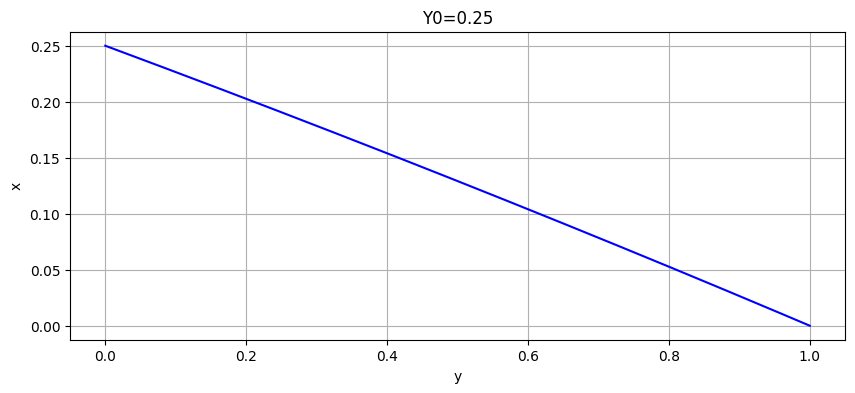

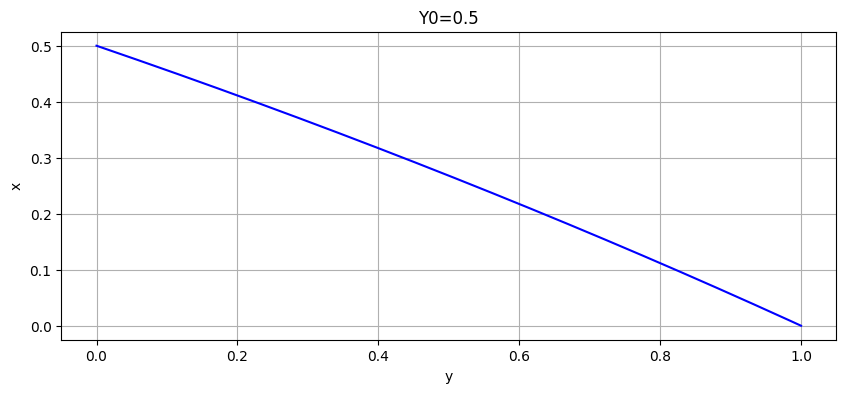

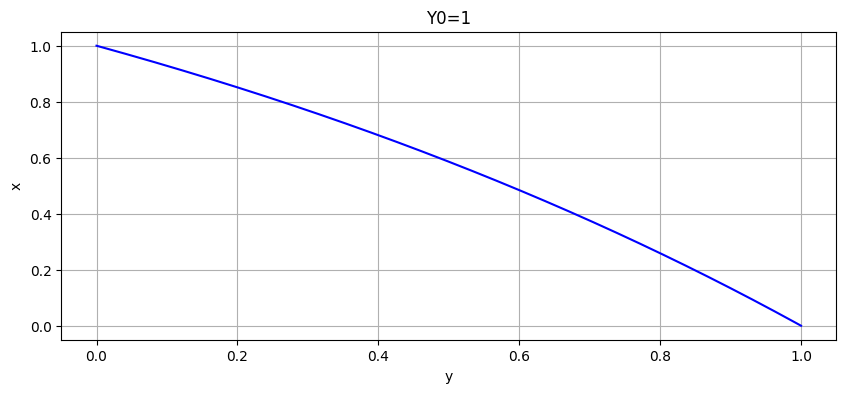

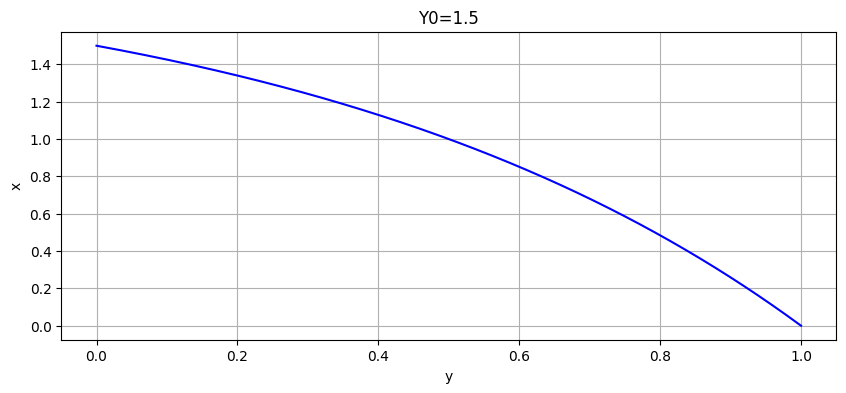

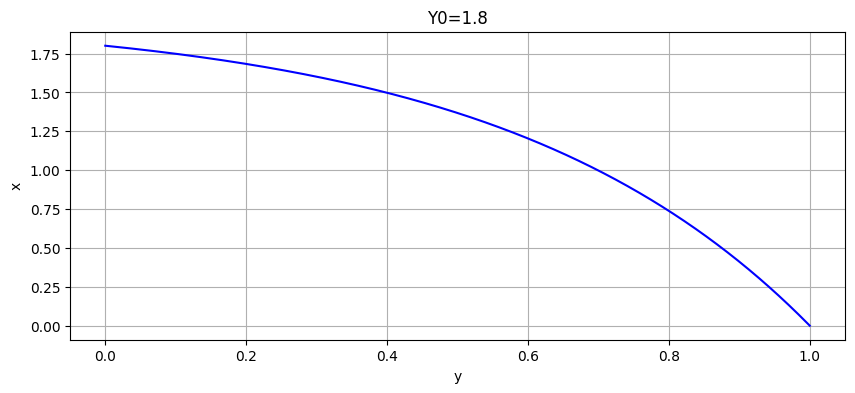

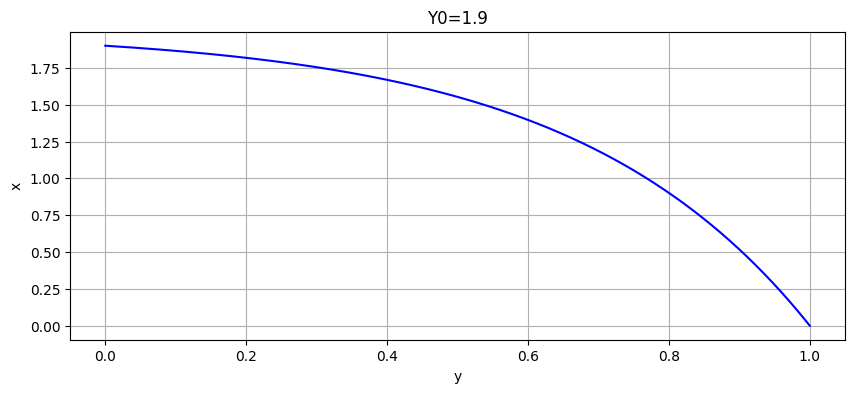

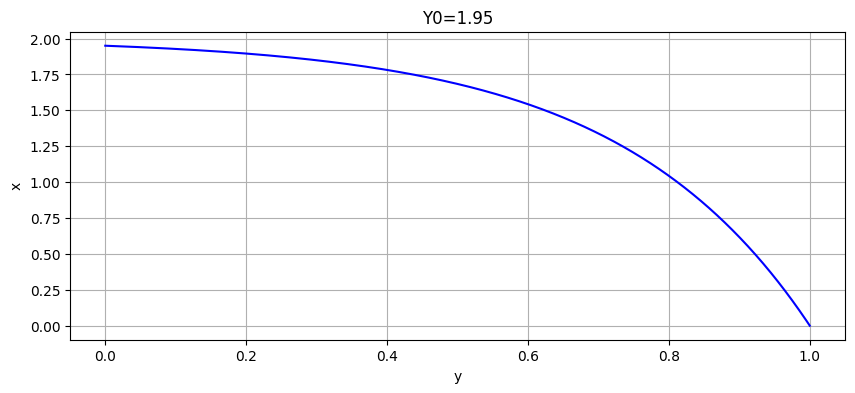

In [9]:
for ind in range(len(Y0)):
    x, y = solve_shooting(f, Y0[ind], Y1, 1e-6, 0.1)
    graph(x, y, f"pictures/shooting{ind}.png", f"Y0={Y0[ind]}")

<img src="pictures/shooting0.png" alt="shooting0"/>
<img src="pictures/shooting1.png" alt="shooting1"/>
<img src="pictures/shooting2.png" alt="shooting2"/>
<img src="pictures/shooting3.png" alt="shooting3"/>
<img src="pictures/shooting4.png" alt="shooting4"/>
<img src="pictures/shooting5.png" alt="shooting5"/>
<img src="pictures/shooting6.png" alt="shooting6"/>

### Метод квазилинеаризации

Метод Ньютона сводит решение нелинейной краевой задачи к решению серии линейных краевых задач и состоит в следующем.
Пусть для нелинейной краевой задачи известна функция $y_{0}(x)$ удовлетворяющая граничным условиям и грубо приближенно равная искомому $y(x)$. 
Положим $y(x)=y_{0}(x)+v(x)$, где $v(x)$ - поправка к нулевому приближению к $y_{0}(x)$. Подставим выражение для $y(x)$ в изначальное уравнение:
$$y''(x)=y_{0}''(x)+v''(x)$$
$$f(x,y_{0}+v,y_{0}'+v')=f(x,y_{0},y_{0}')+\frac{\delta f(x,y_{0},y_{0}')}{\delta y}v+\frac{\delta f(x,y_{0},y_{0}')}{\delta y'}v'+O(v^2+|v'|^2)$$
Отбрасывая остаточный член $O(v^2+|v'|^2)$ получим линейную краевую задачу для нахождения поправки $\tilde v(x)$ с нулевыми краевыми условиями:

$$\tilde v''=p(x)\tilde v'+g(x)\tilde v+r(x)$$
$$\tilde v(0)=0, \tilde v(1)=0$$

$$p(x)=\frac{\delta f(x,y_{0},y_{0}')}{\delta y'}, q(x)=\frac{\delta f(x,y_{0},y_{0}')}{\delta y}, r(x)=f(x,y_{0},y_{0}')-y_{0}''$$

Мы получили уравнение в вариациях с невязкой нулевого решения в качестве правой части. Решая линейную краевую задачу численным методом, найдем поправку $\tilde v$ и примем за первое приближение $y_{1}(x)=y_{0}(x)+\tilde v$.

Аналогично положим $y(x)=y_{1}(x)+\tilde v_{1}$ и найдем следующее приближение. Для него будем решать то же уравнение в вариациях, но с коэффициентами, вычисленными по первому приближению, и с правой частью - невязкой первого приближения. Продолжая процесс до тех пор, пока не будут выполнены неравенства $max|\tilde v(x)|<=\epsilon, 0<=x<=1$, где $\epsilon$ - требуемая точность.